# カーネル密度推定

In [3]:
# Libraries
import os
import sys
sys.path.append(r"C:\Users\yktkk\Desktop\DS_practice\Data_science\Work\KR_prediction_model\src")

import numpy as np
import pandas as pd
from scipy.stats import gaussian_kde
import scipy
from scipy.stats import vonmises
import matplotlib.pyplot as plt

# 分散処理
from tqdm import tqdm
from joblib import Parallel, delayed

import utils as u
u.graph_setting() # graph format

# Base data

### ランダムの乱数

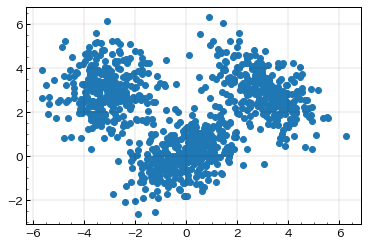

In [4]:
# 各ガウス分布のパラメータ
means = np.array([[0, 0], [3, 3], [-3, 3]])  # 平均
covs = np.array([[[1, 0.5], [0.5, 1]], [[1, -0.5], [-0.5, 1]], [[1, 0], [0, 1]]])  # 共分散行列
weights = np.array([0.4, 0.3, 0.3])  # 各ガウス分布の重み

# 乱数生成
num_samples = 1000  # 生成する乱数の数
components = np.random.choice([0, 1, 2], size=num_samples, p=weights)
samples = np.array([np.random.multivariate_normal(means[i], covs[i]) for i in components])

plt.scatter(samples[:,0], samples[:,1])

### 円形の乱数

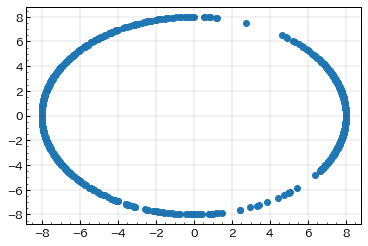

In [5]:
# 円形の分布
# 分布のパラメータ
mu = [1, 0]  # 中心の方向ベクトル
kappa = 10  # 集中度パラメータ

# 乱数生成
num_samples = 1000  # 生成する乱数の数

# 中心部分のサンプル生成
center_samples = vonmises.rvs(kappa, loc=0, size=num_samples // 2)
center_samples_x = np.cos(center_samples) + mu[0]
center_samples_y = np.sin(center_samples) + mu[1]

# 外周部分のサンプル生成
circumference_samples = vonmises.rvs(kappa / 5, loc=np.pi, size=num_samples // 2)
circumference_samples_x = np.cos(circumference_samples) + mu[0]
circumference_samples_y = np.sin(circumference_samples) + mu[1]

# 全体のサンプル結合
x = np.concatenate((center_samples_x, circumference_samples_x)) - 1
y = np.concatenate((center_samples_y, circumference_samples_y))

# 8倍して周上にする
x, y = 8*x, 8*y

plt.scatter(x, y)

### 2つを結合する

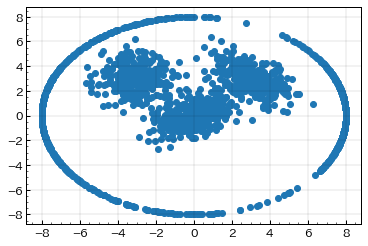

In [6]:
x = np.concatenate([samples[:,0], x])
y = np.concatenate([samples[:,1], y])

plt.scatter(x, y)

# Leearning

In [7]:
# 2次元データとして結合
data = np.vstack((x, y))

### ダルな方法

In [8]:
# カーネル密度推定の学習
kde = gaussian_kde(data)

In [9]:
# 乱数生成
num_samples = 1000  # 生成する乱数の数
samples_pred = kde.resample(num_samples)

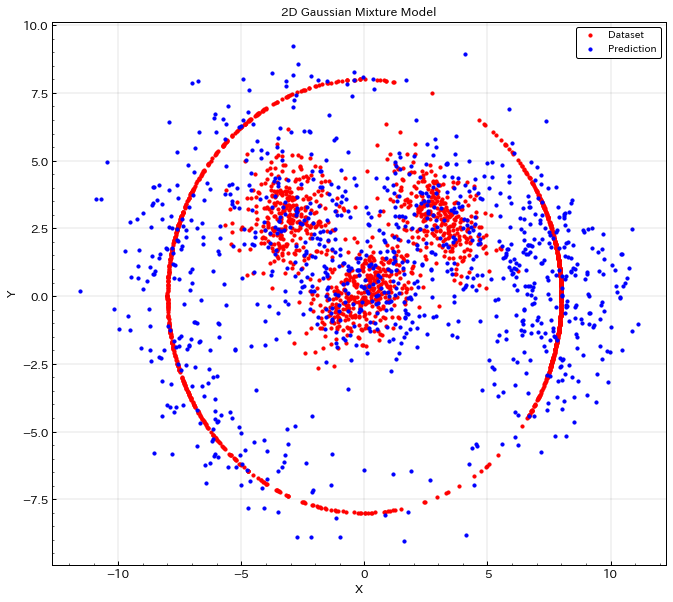

In [10]:
# 結果の表示
plt.figure(figsize=(11,10))
plt.scatter(x, y, s=10, c="red", label="Dataset")
plt.scatter(samples_pred[0], samples_pred[1], s=10, c="blue", label="Prediction")
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Gaussian Mixture Model')
plt.legend()
plt.show()

### ピーキーな方法

In [11]:
from sklearn.neighbors import KernelDensity

In [12]:
kde = KernelDensity(bandwidth=0.1)
data = np.vstack([x,y]).T
kde.fit(data)

KernelDensity(bandwidth=0.1)

In [13]:
# generate range
X = np.linspace(-8, 8, 100)
Y = np.linspace(-8, 8, 100)

X, Y = np.meshgrid(X, Y)

In [14]:
xy = np.column_stack([X.ravel(), Y.ravel()])
log_dens = kde.score_samples(xy)

# 結果のプロット
dens = np.exp(log_dens).reshape(X.shape)

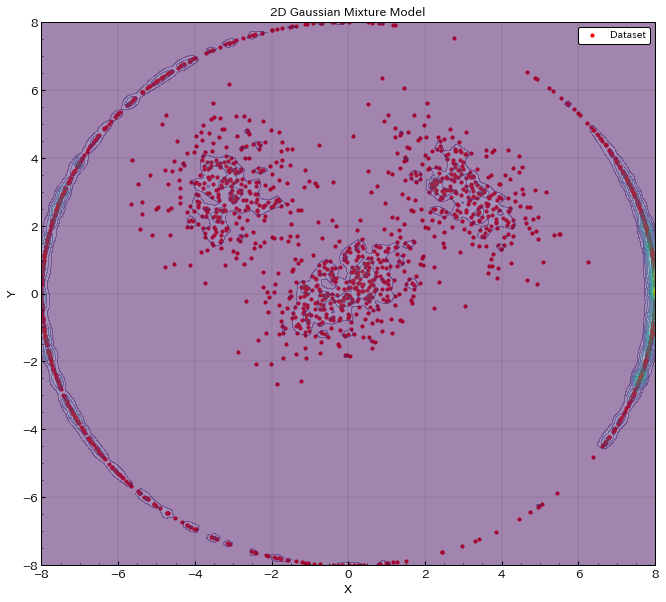

In [15]:
# 結果の表示
plt.figure(figsize=(11,10))
plt.scatter(x, y, s=10, c="red", label="Dataset")
#plt.scatter(X, Y)
plt.contourf(X, Y, dens, levels=20, cmap='viridis', alpha=0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Gaussian Mixture Model')
plt.legend()
plt.show()



In [16]:
# 乱数生成
num_samples = 1000
samples = kde.sample(num_samples)

In [17]:
# prediction
pred_x = samples[:,0]
pred_y = samples[:,1]

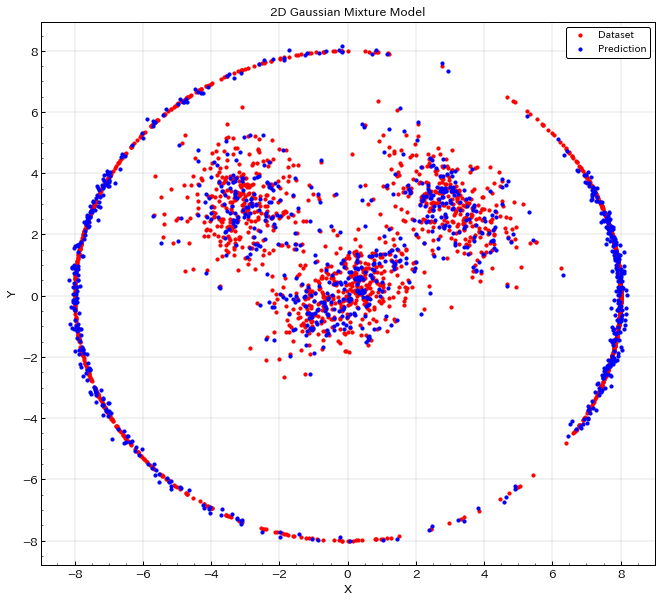

In [18]:
# 結果の表示
plt.figure(figsize=(11,10))
plt.scatter(x, y, s=10, c="red", label="Dataset")
plt.scatter(pred_x, pred_y, s=10, c="blue", label="Prediction")
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Gaussian Mixture Model')
plt.legend()
plt.show()